In [87]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
data = pd.read_csv("heart_2020_cleaned.csv")
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [89]:
data.shape

(319795, 18)

In [90]:
data.replace("Yes", 1, inplace = True)
data.replace("No", 0, inplace = True)
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0


In [91]:
data['Diabetic'].unique()

array([1, 0, 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [92]:
data.replace("Yes (during pregnancy)", 1, inplace = True)
data.replace("No, borderline diabetes", 0, inplace = True)

In [93]:
data["Sex"].unique()

array(['Female', 'Male'], dtype=object)

In [94]:
data.replace("Female", 1, inplace = True)
data.replace("Male", 0, inplace = True)

# Temporarily Convert Categorical Variables for SMOTE

In [95]:
data["AgeCategory"].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [96]:
data.replace("18-24", 0, inplace = True)
data.replace("25-29", 1, inplace = True)
data.replace("30-34", 2, inplace = True)
data.replace("35-39", 3, inplace = True)
data.replace("40-44", 4, inplace = True)
data.replace("45-49", 5, inplace = True)
data.replace("50-54", 6, inplace = True)
data.replace("55-59", 7, inplace = True)
data.replace("60-64", 8, inplace = True)
data.replace("65-69", 9, inplace = True)
data.replace("70-74", 10, inplace = True)
data.replace("75-79", 11, inplace = True)
data.replace("80 or older", 12, inplace = True)

In [97]:
data["Race"].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [98]:
data.replace("White", 0, inplace = True)
data.replace("Black", 1, inplace = True)
data.replace("Asian", 2, inplace = True)
data.replace("American Indian/Alaskan Native", 3, inplace = True)
data.replace("Hispanic", 4, inplace = True)
data.replace("Other", 5, inplace = True)

In [99]:
data["GenHealth"].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [100]:
data.replace("Poor", 0, inplace = True)
data.replace("Fair", 1, inplace = True)
data.replace("Good", 2, inplace = True)
data.replace("Very good", 3, inplace = True)
data.replace("Excellent", 4, inplace = True)

# Calculate Data Proportions

In [101]:
data['HeartDisease'].value_counts()[0] 

292422

In [102]:
data['HeartDisease'].value_counts()[1]

27373

In [103]:
data['HeartDisease'].value_counts()[0] / data.shape[0]

0.9144045404086993

In [104]:
data['HeartDisease'].value_counts()[1] / data.shape[0]

0.08559545959130067

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

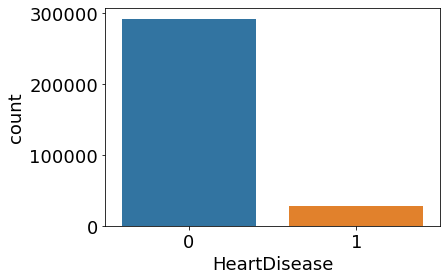

In [105]:
sns.countplot(x='HeartDisease',data=data)

# SMOTE

In [106]:
X = data[['BMI', 'Smoking', 'AlcoholDrinking', "Stroke", 'PhysicalHealth', "MentalHealth", "DiffWalking", "Sex", "AgeCategory", "Race", "Diabetic", "PhysicalActivity", "GenHealth", "SleepTime", "Asthma", "KidneyDisease", "SkinCancer"]]
y = data.HeartDisease

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)

In [108]:
test = pd.concat([X_test, y_test], axis=1)

In [109]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
oversampled = SMOTE(random_state=0)
X_train_smote, y_train_smote = oversampled.fit_resample(X_train, y_train)

In [110]:
train_smote = pd.concat([X_train_smote, y_train_smote], axis=1)

# Change Categorical Data Back to Categories

In [136]:
def reverse_reformat(data):
    replacement_age = {0 : "18-24", 1 : "25-29", 2 : "30-34", 3 : "35-39", 4 : "40-44", 5 : "45-49", 6 : "50-54", 7: "55-59", 8: "60-64", 9: "65-69", 10: "70-74", 11:  "75-79", 12: "80 or older"}
    replacement_race = { 0: "White", 1: "Black", 2 : "Asian", 3: "American Indian/Alaskan Native",  4: "Hispanic", 5: "Other"}
    replacement_genhealth = {0: "Poor", 1: "Fair", 2: "Good", 3: "Very good", 4: "Excellent"}
    replacement_bmi_cut = {0: '(11.937, 19.55]', 1: '(19.55, 27.08]', 2: '(27.08, 34.61]', 3: '(34.61, 42.14]', 4: '(42.14, 49.67]', 5: '(49.67, 57.2]', 6: '(57.2, 64.73]', 7: '(64.73, 72.26]', 8: '(72.26, 79.79]', 9: '(79.79, 87.32]', 10: '(87.32, 94.85]'}
    replacement_bmi_qcut = {0: '(12.019, 21.26]', 1: '(21.26, 23.01]', 2: '(23.01, 24.33]', 3: '(24.33, 25.61]', 4: '(25.61, 26.61]', 5: '(26.61, 27.89]', 6: '(27.89, 29.26]', 7: '(29.26, 31.0]', 8: '(31.0, 33.23]', 9: '(33.23, 36.92]', 10: '(36.92, 94.85]'}
    data['AgeCategory'].replace(replacement_age, inplace = True)
    data['Race'].replace(replacement_race, inplace = True)
    data['GenHealth'].replace(replacement_genhealth, inplace = True)

reverse_reformat(train_smote)
reverse_reformat(data)
train_smote.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,31.63,0,0,0,0.0,0.0,0,0,40-44,Hispanic,0,1,Excellent,6.0,0,0,0,0
1,27.98,1,0,0,0.0,0.0,0,0,70-74,White,1,1,Fair,8.0,0,0,0,1
2,26.58,1,0,0,0.0,0.0,0,0,45-49,White,0,1,Excellent,6.0,0,0,0,0
3,33.28,1,0,0,0.0,23.0,0,1,70-74,White,1,1,Good,8.0,0,0,0,0
4,26.57,0,0,0,0.0,0.0,0,1,18-24,Hispanic,0,0,Very good,8.0,0,0,0,0


# Some EDA

<AxesSubplot:>

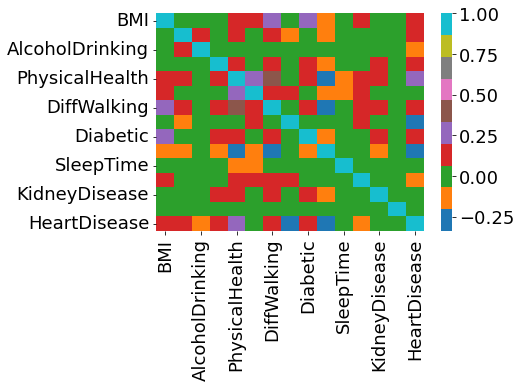

In [112]:
sns.heatmap(train_smote.corr(), cmap='tab10')

In [113]:
train_smote.corr().loc["HeartDisease", :]

BMI                 0.092933
Smoking             0.075172
AlcoholDrinking    -0.160045
Stroke              0.079751
PhysicalHealth      0.243135
MentalHealth        0.045628
DiffWalking         0.178598
Sex                -0.265262
Diabetic            0.120950
PhysicalActivity   -0.263233
SleepTime           0.009837
Asthma             -0.097669
KidneyDisease       0.040832
SkinCancer          0.021672
HeartDisease        1.000000
Name: HeartDisease, dtype: float64

<AxesSubplot:xlabel='AgeCategory', ylabel='count'>

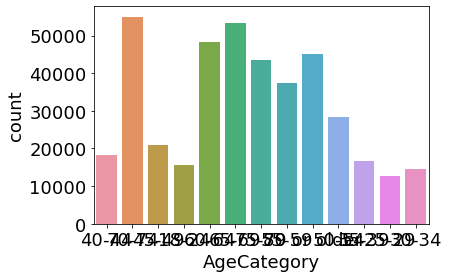

In [114]:
sns.countplot(x='AgeCategory',data=train_smote)

# Baseline Model

In [126]:
model = sm.logit(formula = 'HeartDisease~BMI+Smoking+AlcoholDrinking+Stroke+PhysicalHealth+MentalHealth+DiffWalking+Sex+AgeCategory+Race+Diabetic+PhysicalActivity+GenHealth+SleepTime+Asthma+KidneyDisease+SkinCancer', data = train_smote).fit()

Optimization terminated successfully.
         Current function value: 0.444383
         Iterations 7


In [127]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:               409390
Model:                          Logit   Df Residuals:                   409354
Method:                           MLE   Df Model:                           35
Date:                Sat, 04 Mar 2023   Pseudo R-squ.:                  0.3589
Time:                        09:44:05   Log-Likelihood:            -1.8193e+05
converged:                       True   LL-Null:                   -2.8377e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -2.9293      0.057    -51.167      0.000      -3.042      -2.817
AgeCategory[T.25-29]           0.2979      0.050      5.915      0.000       0.199       0.397
AgeCategory[T.30-34]           0.6011      0.047     12.896      0.000       0.510       0.692
AgeCategory[T.35-39]           0.8569      0.044     19.453      0.000       0.771       0.943
AgeCategory[T.40-44]           1.2022      0.042     28.594      0.000       1.120       1.285
AgeCategory[T.45-49]           1.5427      0.041     37.921      0.000       1.463       1.622
AgeCategory[T.50-54]           1.9871      0.039     50.655      0.000       1.910       2.064
AgeCategory[T.55-59]           2.3104      0.039     60.007      0.000       2.235       2.386
AgeCategory[T.60-64]           2.6257      0.038     68.923      0.000       2.551       2.700
AgeCategory[T.65-69]           2.9110      0.038     76.585      0.000       2.837       2.986
AgeCategory[T.70-74]           3.2515      0.038     85.209      0.000       3.177       3.326
AgeCategory[T.75-79]           3.5531      0.039     91.574      0.000       3.477       3.629
AgeCategory[T.80 or older]     3.6044      0.039     92.838      0.000       3.528       3.680
Race[T.Asian]                 -0.8495      0.046    -18.556      0.000      -0.939      -0.760
Race[T.Black]                 -1.3654      0.037    -37.240      0.000      -1.437      -1.294
Race[T.Hispanic]              -0.5061      0.035    -14.620      0.000      -0.574      -0.438
Race[T.Other]                 -0.9137      0.041    -22.124      0.000      -0.995      -0.833
Race[T.White]                 -0.1412      0.031     -4.545      0.000      -0.202      -0.080
GenHealth[T.Fair]              3.1064      0.020    156.401      0.000       3.067       3.145
GenHealth[T.Good]              2.0901      0.017    122.426      0.000       2.057       2.124
GenHealth[T.Poor]              4.0816      0.028    147.792      0.000       4.027       4.136
GenHealth[T.Very good]         1.1017      0.017     64.206      0.000       1.068       1.135
BMI                            0.0073      0.001     10.372      0.000       0.006       0.009
Smoking                       -0.1826      0.009    -21.419      0.000      -0.199      -0.166
AlcoholDrinking               -1.8634      0.030    -61.580      0.000      -1.923      -1.804
Stroke                         0.0755      0.021      3.640      0.000       0.035       0.116
PhysicalHealth                -0.0052      0.001     -8.601      0.000      -0.006      -0.004
MentalHealth                   0.0076      0.001     13.410      0.000       0.006       0.009
DiffWalking                   -0.4525      0.013    -35.581      0.000      -0.477      -0.428
Sex                           -1.3631      0.009   -153.837      0.000      -1.380      -1.346
Diabetic                      -0.2224      0.012    -19.322      0.000      -0.245      -0.200
PhysicalAct

In [128]:
from sklearn.metrics import roc_curve, auc
#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))
    return pred_values

Classification accuracy = 81.3%
Precision = 23.9%
TPR or Recall = 54.0%
FNR = 46.0%
FPR = 16.1%
ROC-AUC = 78.7%


0         0.045198
1         0.431221
2         0.801958
3         0.647883
4         0.033629
            ...   
319790    0.681259
319791    0.056859
319792    0.150476
319793    0.072715
319794    0.606151
Length: 319795, dtype: float64

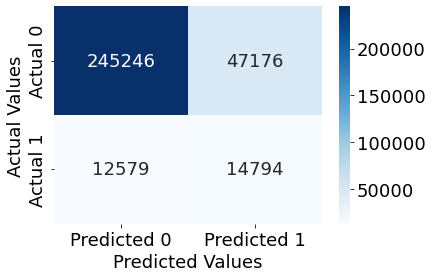

In [138]:
confusion_matrix_data(data,data.HeartDisease,model,0.6)

# Forward Stepwise Selection

In [115]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time

In [116]:
train_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409390 entries, 0 to 409389
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BMI               409390 non-null  float64
 1   Smoking           409390 non-null  int64  
 2   AlcoholDrinking   409390 non-null  int64  
 3   Stroke            409390 non-null  int64  
 4   PhysicalHealth    409390 non-null  float64
 5   MentalHealth      409390 non-null  float64
 6   DiffWalking       409390 non-null  int64  
 7   Sex               409390 non-null  int64  
 8   AgeCategory       409390 non-null  object 
 9   Race              409390 non-null  object 
 10  Diabetic          409390 non-null  int64  
 11  PhysicalActivity  409390 non-null  int64  
 12  GenHealth         409390 non-null  object 
 13  SleepTime         409390 non-null  float64
 14  Asthma            409390 non-null  int64  
 15  KidneyDisease     409390 non-null  int64  
 16  SkinCancer        40

In [117]:
#Take out race, age group and health
X = train_smote[['BMI', 'Smoking', 'AlcoholDrinking', "Stroke", "Sex",'PhysicalHealth', "DiffWalking", "Diabetic", "PhysicalActivity", "SleepTime", "Asthma", "KidneyDisease", "SkinCancer"]]



In [118]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.logit('HeartDisease~' + '+'.join(predictor_subset),data = train_smote).fit()
    llr_pvalue = model.llr_pvalue
    return {"model":model, "llr_pvalue":llr_pvalue}
#Function to select the best model amongst all models with 'k' predictors
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['llr_pvalue'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

In [119]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['llr_pvalue'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [120]:
def forward_selection():
    models_best = pd.DataFrame(columns=["llr_pvalue", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [121]:
models_best = forward_selection()


Optimization terminated successfully.
         Current function value: 0.688789
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.690319
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.678547
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.689890
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.657472
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.662103
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.676878
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.685752
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.657880
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.693099
  

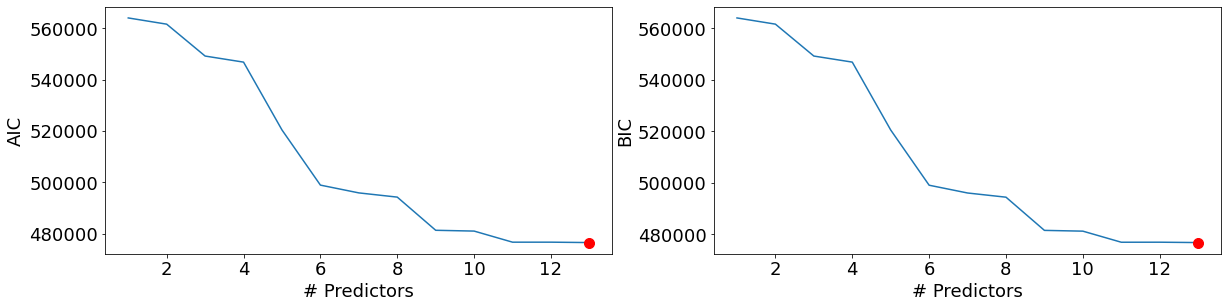

In [122]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    llr_pvalue = models_best.apply(lambda row: row[1].llr_pvalue, axis=1)

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 1)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
best_sub_plots()

# VIF

In [143]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

             feature        VIF
0              const  54.782921
1                BMI   1.113899
2            Smoking   1.035308
3    AlcoholDrinking   1.016687
4             Stroke   1.029939
5                Sex   1.039117
6     PhysicalHealth   1.343115
7        DiffWalking   1.377622
8           Diabetic   1.092440
9   PhysicalActivity   1.214120
10         SleepTime   1.012846
11            Asthma   1.027016
12     KidneyDisease   1.034961
13        SkinCancer   1.010989


In [125]:
model13 = models_best['model'][13]
model13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:               409390
Model:                          Logit   Df Residuals:                   409376
Method:                           MLE   Df Model:                           13
Date:                Sat, 04 Mar 2023   Pseudo R-squ.:                  0.1604
Time:                        09:42:52   Log-Likelihood:            -2.3826e+05
converged:                       True   LL-Null:                   -2.8377e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4711      0.026     17.832      0.000       0.419       0.523
BMI                  0.0040      0.001      6.860      0.000       0.003       0.005
Smoking              0.1304      0.007     18.215      0.000       0.116       0.144
AlcoholDrinking     -2.1637      0.028    -78.478      0.000      -2.218      -2.110
Stroke               0.5038      0.019     26.726      0.000       0.467       0.541
Sex                 -1.1953      0.007   -161.470      0.000      -1.210      -1.181
PhysicalHealth       0.0384      0.000     87.285      0.000       0.038       0.039
DiffWalking          0.3429      0.011     31.682      0.000       0.322       0.364
Diabetic             0.3433      0.010     34.012      0.000       0.323       0.363
PhysicalActivity    -0.9087      0.008   -111.771      0.000      -0.925      -0.893
SleepTime            0.0348      0.002     14.377      0.000       0.030       0.040
Asthma              -0.7992      0.012    -64.262      0.000      -0.824      -0.775
KidneyDisease       -0.0170      0.020     -0.863      0.388      -0.055       0.022
SkinCancer           0.1515      0.012     12.466      0.000       0.128       0.175
====================================================================================
"""

Classification accuracy = 81.7%
Precision = 21.1%
TPR or Recall = 41.4%
FNR = 58.6%
FPR = 14.5%
ROC-AUC = 70.1%


0         0.189766
1         0.309142
2         0.595988
3         0.433588
4         0.539242
            ...   
319790    0.745599
319791    0.307208
319792    0.209615
319793    0.456260
319794    0.237114
Length: 319795, dtype: float64

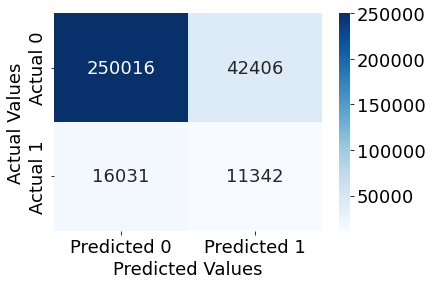

In [144]:
confusion_matrix_data(data,data.HeartDisease,model13,0.6)

In [145]:
#Inclusion of other categorical variables is better

# Interactions

In [147]:
#Interaction between Asthma and Smoking
model2 = sm.logit(formula = 'HeartDisease~AgeCategory+GenHealth+Asthma*Smoking+Diabetic+KidneyDisease+Stroke+Sex+AlcoholDrinking+DiffWalking+BMI+SkinCancer+MentalHealth+Race+SleepTime+PhysicalActivity+PhysicalHealth', data = train_smote).fit()



Optimization terminated successfully.
         Current function value: 0.444382
         Iterations 7


Classification accuracy = 81.3%
Precision = 23.9%
TPR or Recall = 54.0%
FNR = 46.0%
FPR = 16.1%
ROC-AUC = 78.7%


0         0.044971
1         0.431125
2         0.801097
3         0.647766
4         0.033621
            ...   
319790    0.680089
319791    0.056570
319792    0.150411
319793    0.072680
319794    0.606009
Length: 319795, dtype: float64

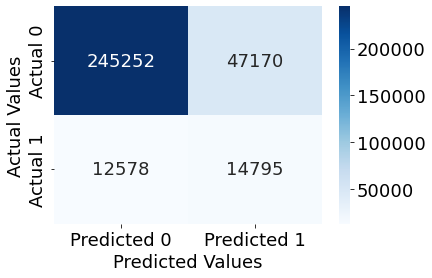

In [149]:
confusion_matrix_data(data,data.HeartDisease,model2,0.6)

In [150]:
#Interaction between Diabetic and Kidney
model3 = sm.logit(formula = 'HeartDisease~AgeCategory+GenHealth+Asthma+Smoking+Diabetic*KidneyDisease+Stroke+Sex+AlcoholDrinking+DiffWalking+BMI+SkinCancer+MentalHealth+Race+SleepTime+PhysicalActivity+PhysicalHealth', data = train_smote).fit()


Optimization terminated successfully.
         Current function value: 0.444270
         Iterations 7


Classification accuracy = 81.3%
Precision = 23.9%
TPR or Recall = 54.1%
FNR = 45.9%
FPR = 16.1%
ROC-AUC = 78.7%


0         0.044135
1         0.432285
2         0.798342
3         0.649588
4         0.033682
            ...   
319790    0.676352
319791    0.056940
319792    0.151152
319793    0.072796
319794    0.607844
Length: 319795, dtype: float64

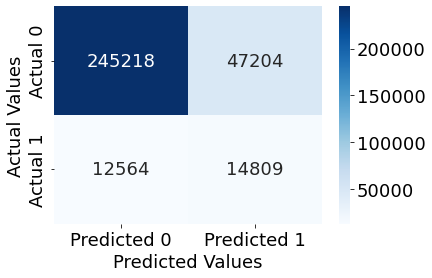

In [151]:
confusion_matrix_data(data,data.HeartDisease,model3,0.6)

In [152]:
#Interaction between both
model4 = sm.logit(formula = 'HeartDisease~AgeCategory+GenHealth+Asthma*Smoking+Diabetic*KidneyDisease+Stroke+Sex+AlcoholDrinking+DiffWalking+BMI+SkinCancer+MentalHealth+Race+SleepTime+PhysicalActivity+PhysicalHealth', data = train_smote).fit()


Optimization terminated successfully.
         Current function value: 0.444270
         Iterations 7


Classification accuracy = 81.3%
Precision = 23.9%
TPR or Recall = 54.1%
FNR = 45.9%
FPR = 16.1%
ROC-AUC = 78.7%


0         0.043928
1         0.432196
2         0.797531
3         0.649480
4         0.033674
            ...   
319790    0.675257
319791    0.056671
319792    0.151091
319793    0.072763
319794    0.607713
Length: 319795, dtype: float64

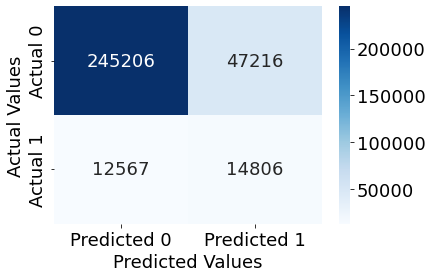

In [153]:
confusion_matrix_data(data,data.HeartDisease,model4,0.6)

In [154]:
#AgeCategory * GenHealth
model5 = sm.logit(formula = 'HeartDisease~AgeCategory*GenHealth+Asthma+Smoking+Diabetic+KidneyDisease+Stroke+Sex+AlcoholDrinking+DiffWalking+BMI+SkinCancer+MentalHealth+Race+SleepTime+PhysicalActivity+PhysicalHealth', data = train_smote).fit()


Optimization terminated successfully.
         Current function value: 0.441727
         Iterations 8


Classification accuracy = 80.6%
Precision = 23.2%
TPR or Recall = 54.8%
FNR = 45.2%
FPR = 17.0%
ROC-AUC = 78.8%


0         0.034741
1         0.485458
2         0.781655
3         0.646952
4         0.026793
            ...   
319790    0.687399
319791    0.046321
319792    0.144988
319793    0.068795
319794    0.605644
Length: 319795, dtype: float64

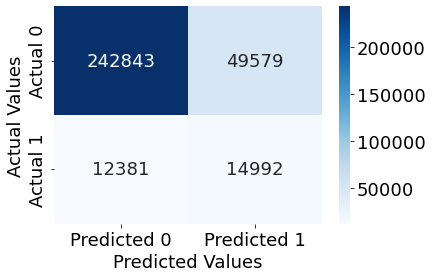

In [155]:
confusion_matrix_data(data,data.HeartDisease,model5,0.6)

In [156]:
model6 = sm.logit(formula = 'HeartDisease~AgeCategory+GenHealth+Asthma+Smoking+Diabetic+KidneyDisease+Sex+AlcoholDrinking+Stroke*DiffWalking+BMI+SkinCancer+MentalHealth+Race+SleepTime+PhysicalActivity+PhysicalHealth', data = train_smote).fit()


Optimization terminated successfully.
         Current function value: 0.444381
         Iterations 7


Classification accuracy = 81.3%
Precision = 23.9%
TPR or Recall = 54.1%
FNR = 45.9%
FPR = 16.1%
ROC-AUC = 78.7%


0         0.045190
1         0.426468
2         0.802066
3         0.648101
4         0.033514
            ...   
319790    0.680638
319791    0.056873
319792    0.150557
319793    0.072738
319794    0.606510
Length: 319795, dtype: float64

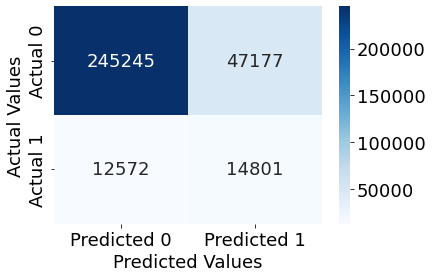

In [157]:
confusion_matrix_data(data,data.HeartDisease,model6,0.6)